In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [89]:
#permet dafficher les output en entier sans réduction en fenêtre avec scroll

<h3 style="text-align:right";>EL BABARTI Selma et RAVONJIARIVELO Christelle</h3>
<h2 style="text-align:right";>M1 MCN - SAE DATA</h2>

Ce notebook présente une étude des données des téléphones `telephones.data` et de leurs prix `historiquePrix.data` extraits du site `lesnumériques.com` 

## Importation des bibliothèques

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
import pingouin as pg
from pandas import plotting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8) #taille des figures plt

pd.set_option('display.max_rows', 100) # capacité maximale d'affichage à 100 lignes

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Importation des fichiers CSV

#### Importation de `telephone.data`

In [3]:
df1 = pd.read_csv("telephones.data", sep="\t") # pas d'indication d'index pour pouvoir merge
df1

url  \
0    https://www.lesnumeriques.com/telephone-portab...   
1    https://www.lesnumeriques.com/telephone-portab...   
2    https://www.lesnumeriques.com/telephone-portab...   
3    https://www.lesnumeriques.com/telephone-portab...   
4    https://www.lesnumeriques.com/telephone-portab...   
..                                                 ...   
190  https://www.lesnumeriques.com/telephone-portab...   
191  https://www.lesnumeriques.com/telephone-portab...   
192  https://www.lesnumeriques.com/telephone-portab...   
193  https://www.lesnumeriques.com/telephone-portab...   
194  https://www.lesnumeriques.com/telephone-portab...   

                          nom   marque   age  noteFinale  ergoDesign  ecran  \
0       Samsung Galaxy Note 9  Samsung  4.19         5.0         5.0    5.0   
1              Google Pixel 3   Google  4.04         5.0         4.0    5.0   
2             Apple iPhone XR    Apple  3.99         5.0         4.0    4.0   
3           Google Pixel 3 XL   Google  4.03         5.0         4.0    5.0   
4             Apple iPhone XS    Apple  4.10         5.0         5.0    5.0   
..                        ...      ...   ...         ...         ...    ...   
190              Oppo Reno4 Z     Oppo  2.08         3.0         4.0    4.0   
191       Huawei P Smart 2021   Huawei  1.93         3.0         1.0    4.0   
192                  Oppo A53     Oppo  1.89         3.0         4.0    4.0   
193  Samsung Galaxy S21 Ultra  Samsung  1.96         5.0         5.0    5.0   
194   Xiaomi Redmi Note 9T 5G   Xiaomi  1.81         3.0         4.0    4.0   

     perfs  photo  audio  autonomie  reparabilite  durabilite    prix0  \
0      5.0    5.0    5.0        4.0           NaN         NaN  1009.00   
1      5.0    5.0    5.0        4.0           NaN         NaN   737.02   
2      5.0    5.0    2.0        5.0           2.0         3.0   859.00   
3      5.0    5.0    5.0        4.0           NaN         NaN   813.00   
4      5.0    5.0    2.0        5.0           3.0         NaN  1157.00   
..     ...    ...    ...        ...           ...         ...      ...   
190    4.0    3.0    NaN        3.0           4.0         3.0   329.00   
191    3.0    2.0    NaN        4.0           4.0         3.0   189.07   
192    4.0    3.0    NaN        5.0           4.0         3.0   176.50   
193    5.0    4.0    NaN        4.0           4.0         4.0  1259.00   
194    4.0    3.0    NaN        5.0           4.0         2.0   269.00   

      prix50  prix100                                           urlImage  
0     700.30   398.98  https://cdn.lesnumeriques.com/optim/produits/3...  
1     959.00   312.99  https://cdn.lesnumeriques.com/optim/produits/4...  
2     709.00   583.00  https://cdn.lesnumeriques.com/optim/produits/7...  
3     959.00   307.00  https://cdn.lesnumeriques.com/optim/produits/4...  
4     865.89   899.00  https://cdn.lesnumeriques.com/optim/produits/7...  
..       ...      ...                                                ...  
190   286.99   277.99  https://cdn.lesnumeriques.com/optim/product/60...  
191   317.17   197.50  https://cdn.lesnumeriques.com/optim/product/61...  
192   179.00   209.00  https://cdn.lesnumeriques.com/optim/product/61...  
193  1214.99   735.60  https://cdn.lesnumeriques.com/optim/product/60...  
194   263.90   213.22  https://cdn.lesnumeriques.com/optim/product/61...  

[195 rows x 17 columns]

Il s'agit d'un tableau de **195 lignes x 17 colonnes**. Les lignes représentent des **téléphones** présents sur le site `lesnumeriques.com` en fonction de leurs marques, de leurs ages (référence : 01 novembre 2022), des notes de performances, de durabilité et de réparabilité et des prix à 0, 50 et 100 semaines de la sortie des téléphones. Il y a également une colonne URL de l'article de présentation du téléphone sur `lesnumeriques.com` et de l'URL de l'image du téléphone.

In [4]:
df1.nunique() #compte valeurs uniques

url             195
nom             195
marque           24
age             128
noteFinale        5
ergoDesign        5
ecran             4
perfs             5
photo             5
audio             4
autonomie         5
reparabilite      5
durabilite        4
prix0           142
prix50          181
prix100         192
urlImage        192
dtype: int64

In [5]:
df1.groupby(['nom']).size() #primary key

nom
Apple iPhone 11            1
Apple iPhone 11 Pro        1
Apple iPhone 11 Pro Max    1
Apple iPhone 12            1
Apple iPhone 12 Pro        1
                          ..
Xiaomi Redmi Note 9        1
Xiaomi Redmi Note 9 Pro    1
Xiaomi Redmi Note 9S       1
Xiaomi Redmi Note 9T 5G    1
iPhone SE 2020             1
Length: 195, dtype: int64

On peut déduire que la clé primaire de ce Dataframe est `nom`. 

In [6]:
df1.dtypes

url              object
nom              object
marque           object
age             float64
noteFinale      float64
ergoDesign      float64
ecran           float64
perfs           float64
photo           float64
audio           float64
autonomie       float64
reparabilite    float64
durabilite      float64
prix0           float64
prix50          float64
prix100         float64
urlImage         object
dtype: object

#### Importation de `historiquePrix.data`

In [7]:
df2 = pd.read_csv("historiquePrix.data", sep="\t")
df2

date dateDetaillee                                                url  \
0         1    2019-02-06  https://www.lesnumeriques.com/telephone-portab...   
1         1    2019-02-06  https://www.lesnumeriques.com/telephone-portab...   
2         1    2019-02-06  https://www.lesnumeriques.com/telephone-portab...   
3         1    2019-02-06  https://www.lesnumeriques.com/telephone-portab...   
4         1    2019-02-06  https://www.lesnumeriques.com/telephone-portab...   
...     ...           ...                                                ...   
18495    92    2022-10-12  https://www.lesnumeriques.com/telephone-portab...   
18496    92    2022-10-12  https://www.lesnumeriques.com/telephone-portab...   
18497    92    2022-10-12  https://www.lesnumeriques.com/telephone-portab...   
18498    90    2022-10-12  https://www.lesnumeriques.com/telephone-portab...   
18499    90    2022-10-12  https://www.lesnumeriques.com/telephone-portab...   

       Amazon  Auchan  Boulanger  Carrefour  Cdiscount  Conforama  Darty.com  \
0         NaN  1013.0     1009.0        NaN     864.99    1000.99     1009.0   
1      759.00     NaN      659.0        NaN        NaN        NaN      659.0   
2      844.00   863.0      859.0        NaN     849.99     884.00      859.0   
3         NaN     NaN      759.0        NaN        NaN        NaN      759.0   
4      218.97   253.0      229.0        NaN     242.99     260.99      229.0   
...       ...     ...        ...        ...        ...        ...        ...   
18495     NaN     NaN        NaN        NaN        NaN        NaN        NaN   
18496     NaN     NaN        NaN        NaN        NaN        NaN        NaN   
18497     NaN     NaN        NaN        NaN        NaN        NaN        NaN   
18498     NaN     NaN        NaN        NaN        NaN        NaN        NaN   
18499     NaN     NaN        NaN        NaN        NaN        NaN        NaN   

       ...  reconditionne: Fnac.com  reconditionne: reBuy  \
0      ...                      NaN                   NaN   
1      ...                      NaN                   NaN   
2      ...                      NaN                   NaN   
3      ...                      NaN                   NaN   
4      ...                      NaN                   NaN   
...    ...                      ...                   ...   
18495  ...                      NaN                   NaN   
18496  ...                      NaN                   NaN   
18497  ...                      NaN                   NaN   
18498  ...                      NaN                   NaN   
18499  ...                      NaN                   NaN   

       occasion: Amazon Marketplace   occasion: Cdiscount Marketplace  \
0                                NaN                              NaN   
1                                NaN                              NaN   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                                NaN                              NaN   
...                              ...                              ...   
18495                         243.30                              NaN   
18496                         174.00                              NaN   
18497                         193.00                              NaN   
18498                         632.22                              NaN   
18499                         181.99                              NaN   

       occasion: Darty.com Marketplace  occasion: eBay  \
0                                  NaN             NaN   
1                                  NaN             NaN   
2                                  NaN             NaN   
3                                  NaN             NaN   
4                                  NaN             NaN   
...                                ...             ...   
18495                              NaN             NaN   
18496      

In [8]:
df2.groupby('url').size() #1 url = 1 modèle de téléphone
#175 modèles de téléphones, certains ont occurence < 100 donc pas forcément 100 semaines.

url
https://www.lesnumeriques.com/telephone-portable/2-1-p44573/test.html                         91
https://www.lesnumeriques.com/telephone-portable/3-1-plus-p49943/test.html                    96
https://www.lesnumeriques.com/telephone-portable/5-1-plus-p49941/test.html                   100
https://www.lesnumeriques.com/telephone-portable/apple-iphone-11-max-p53567/test.html        100
https://www.lesnumeriques.com/telephone-portable/apple-iphone-11-p52757/test.html            100
                                                                                            ... 
https://www.lesnumeriques.com/telephone-portable/xiaomi-redmi-note-8t-p54683/test.html       100
https://www.lesnumeriques.com/telephone-portable/xiaomi-redmi-note-9-p56763/test.html        100
https://www.lesnumeriques.com/telephone-portable/xiaomi-redmi-note-9-pro-p56829/test.html    100
https://www.lesnumeriques.com/telephone-portable/xiaomi-redmi-note-9s-p57119/test.html       100
https://www.lesnumeriques.

Il s'agit d'un tableau de **18500 lignes x 40 colonnes**. Les lignes représentent des **prix des téléphones** présents sur le site `lesnumeriques.com` en fonction d'une date et dans différentes boutiques sur **100 semaines (ou moins)**. Il y a également des colonnes `prixMoyen`, `prixMax`, `prixMin` selon les prix trouvés des boutiques. Les téléphones sont présentés selon leurs `url` sur le site `lesnumeriques.com`.

In [9]:
df2.nunique() #compte valeurs uniques

date                                 100
dateDetaillee                        197
url                                  195
Amazon                              2661
Auchan                               104
Boulanger                            149
Carrefour                             44
Cdiscount                           1196
Conforama                            172
Darty.com                            128
E. Leclerc - High-Tech                80
Electro Depot                        513
Fnac.com                             262
La Redoute                          2255
LDLC                                 192
Materiel.net                         334
Rue du Commerce                     1274
Ubaldi                               547
marketplace: Amazon                 5147
marketplace: Cdiscount              4448
marketplace: Conforama               479
marketplace: Darty                  4952
marketplace: Fnac.com               2488
marketplace: La Redoute              201
marketplace: Mis

In [10]:
df2.groupby(['url','date']).size() #primary key

url                                                                                   date
https://www.lesnumeriques.com/telephone-portable/2-1-p44573/test.html                 1       1
                                                                                      2       1
                                                                                      3       1
                                                                                      4       1
                                                                                      5       1
                                                                                             ..
https://www.lesnumeriques.com/telephone-portable/xiaomi-redmi-note-9t-5g-p61443.html  86      1
                                                                                      87      1
                                                                                      88      1
                                             

On peut déduire que la clé primaire de ce Dataframe est `url, date`. 

In [11]:
df2.dtypes

date                                 int64
dateDetaillee                       object
url                                 object
Amazon                             float64
Auchan                             float64
Boulanger                          float64
Carrefour                          float64
Cdiscount                          float64
Conforama                          float64
Darty.com                          float64
E. Leclerc - High-Tech             float64
Electro Depot                      float64
Fnac.com                           float64
La Redoute                         float64
LDLC                               float64
Materiel.net                       float64
Rue du Commerce                    float64
Ubaldi                             float64
marketplace: Amazon                float64
marketplace: Cdiscount             float64
marketplace: Conforama             float64
marketplace: Darty                 float64
marketplace: Fnac.com              float64
marketplace

# I-  Préparation du jeu de données

Nous allons commencer par supprimer les marques de téléphones qui ont moins de 5 modèles représentés. Ce sera donc une **suppression sur les lignes**

Tout d'abord, nous cherchons le **nombre de modèles de téléphones** présentés par marque. Pour cela, nous pouvons soit faire un **value_counts()** ou un **groupby()**. Afin de pouvoir réutiliser les données tirées de cette manipulation, nous faisons un **to_frame()** et nous créons un nouveau dataframe `dfApparition`. Cela nous permettra par la suite, de ne pas faire de saisie manuelle des marques à supprimer.

In [12]:
dfApparition = df1.groupby(['marque']).size().sort_values().to_frame('effectif') #compter les occurences des marques
#tri des valeurs dans l'ordre croissant
#transformation en dataframe
dfApparition

effectif
marque               
Asus                1
Black Shark         1
BlackBerry          1
Cat Phones          1
Crosscall           1
Fairphone           1
Hisense             1
Pocophone           1
Poco                2
Vivo                3
Wiko                3
Gigaset             4
Realme              6
Honor               7
Google              9
Sony               10
OnePlus            10
Oppo               11
Apple              11
Nokia              12
Motorola           12
Huawei             21
Xiaomi             32
Samsung            34

<AxesSubplot:title={'center':'Nombre de téléphones par marque'}, xlabel='marque'>

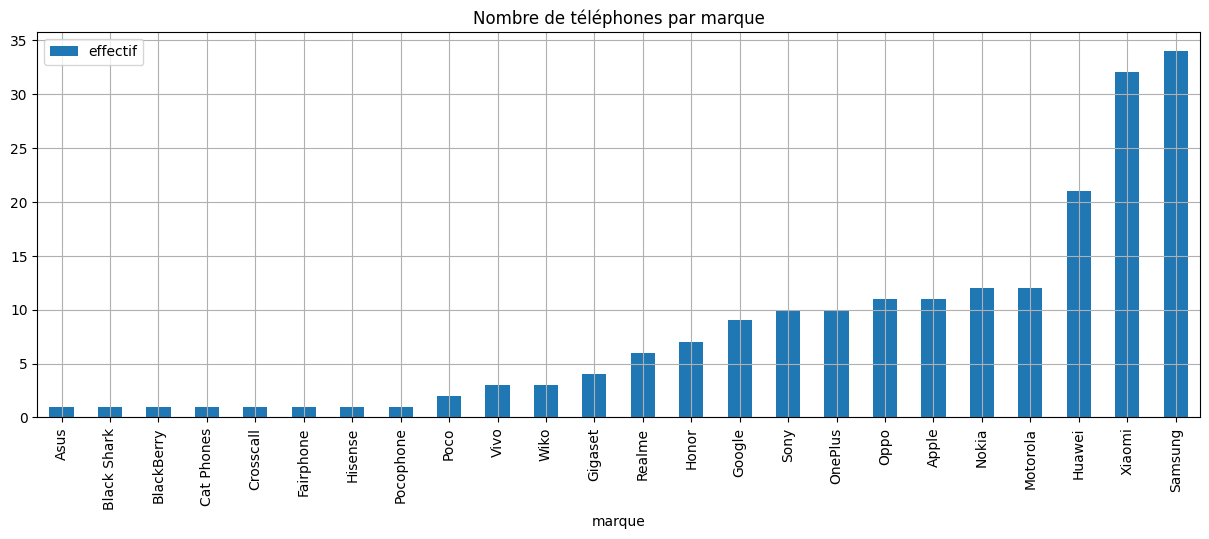

In [13]:
dfApparition.plot.bar(figsize=(15,5), grid=True, title ='Nombre de téléphones par marque')

 Grace à ce dataframe `dfApparition`, nous avons une liste des occurences des marques. Nous pouvons donc voir que les marques `Asus, Black Shark, BlackBerry, Cat Phones, Crosscall, Fairphone, Hisense, Pocophone, Poco, Vivo, Wiko et Gigaset` comptent moins de 5 modèles représentés sur le site `lesnumeriques.com`.
Nous allons donc supprimer les marques dont l'effectif est inférieur à 5.

In [14]:
dfApparition = dfApparition.query('effectif >= 5').reset_index() #suppression des marques de moins de 5 modèles.
dfApparition

marque  effectif
0     Realme         6
1      Honor         7
2     Google         9
3       Sony        10
4    OnePlus        10
5       Oppo        11
6      Apple        11
7      Nokia        12
8   Motorola        12
9     Huawei        21
10    Xiaomi        32
11   Samsung        34

<AxesSubplot:title={'center':'Nombre de téléphones par marque'}>

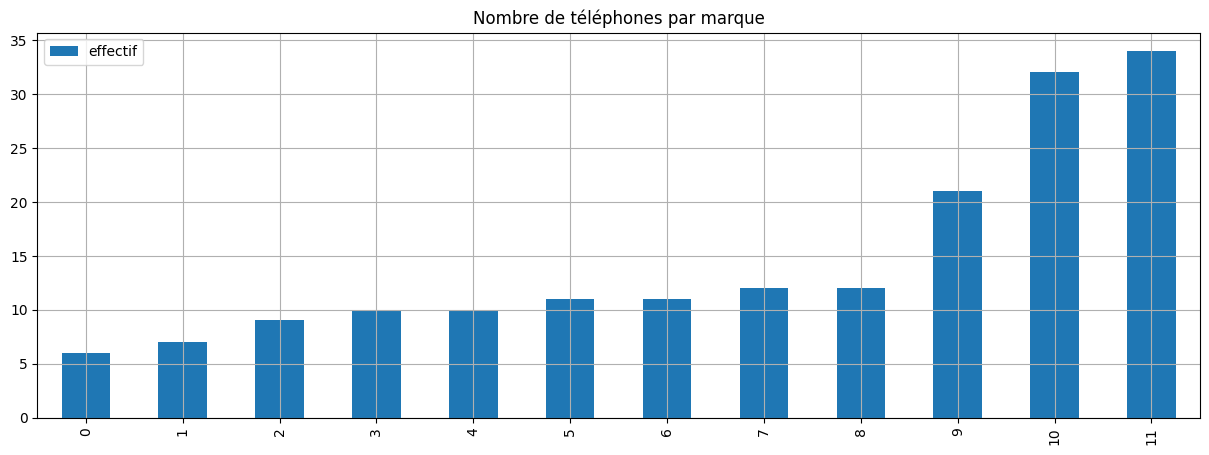

In [15]:
dfApparition.plot.bar(figsize=(15,5), grid=True, title ='Nombre de téléphones par marque')

In [16]:
dfApparition.marque.to_frame() #dataframe avec que les marques que nous gardons

marque
0     Realme
1      Honor
2     Google
3       Sony
4    OnePlus
5       Oppo
6      Apple
7      Nokia
8   Motorola
9     Huawei
10    Xiaomi
11   Samsung

Afin de supprimer les lignes du dataframe `df1` qui représentent les téléphones que nous venons de supprimer précedemment, nous faisons une jointure naturelle sur `dfApparition` et `df1` sur `marque`. La jointure naturelle implique que l'on ne garde que les données communes aux deux dataframes. 

In [17]:
df1 = df1.merge(dfApparition.marque.to_frame(), on='marque', how = 'inner') #ce qui fait qu'on ne garde que les téléphones dont la marque sont dans le df dfApparition
df1

url  \
0    https://www.lesnumeriques.com/telephone-portab...   
1    https://www.lesnumeriques.com/telephone-portab...   
2    https://www.lesnumeriques.com/telephone-portab...   
3    https://www.lesnumeriques.com/telephone-portab...   
4    https://www.lesnumeriques.com/telephone-portab...   
..                                                 ...   
170  https://www.lesnumeriques.com/telephone-portab...   
171  https://www.lesnumeriques.com/telephone-portab...   
172  https://www.lesnumeriques.com/telephone-portab...   
173  https://www.lesnumeriques.com/telephone-portab...   
174  https://www.lesnumeriques.com/telephone-portab...   

                          nom   marque   age  noteFinale  ergoDesign  ecran  \
0       Samsung Galaxy Note 9  Samsung  4.19         5.0         5.0    5.0   
1    Samsung Galaxy A7 (2018)  Samsung  3.96         4.0         3.0    5.0   
2    Samsung Galaxy A9 (2018)  Samsung  3.73         4.0         4.0    5.0   
3         Samsung Galaxy S10e  Samsung  3.64         4.0         5.0    5.0   
4          Samsung Galaxy S10  Samsung  3.64         4.0         5.0    5.0   
..                        ...      ...   ...         ...         ...    ...   
170              Realme 5 Pro   Realme  2.78         4.0         4.0    4.0   
171                  Realme 6   Realme  2.50         3.0         4.0    4.0   
172              Realme 6 Pro   Realme  2.47         4.0         4.0    4.0   
173         Realme X50 Pro 5G   Realme  2.43         4.0         4.0    5.0   
174      Realme X3 Super Zoom   Realme  2.38         3.0         3.0    4.0   

     perfs  photo  audio  autonomie  reparabilite  durabilite    prix0  \
0      5.0    5.0    5.0        4.0           NaN         NaN  1009.00   
1      4.0    3.0    4.0        5.0           NaN         NaN   300.25   
2      4.0    3.0    4.0        5.0           NaN         NaN   386.00   
3      5.0    4.0    5.0        3.0           3.0         NaN   759.00   
4      5.0    5.0    5.0        3.0           1.0         NaN   909.00   
..     ...    ...    ...        ...           ...         ...      ...   
170    5.0    3.0    NaN        5.0           NaN         NaN   199.99   
171    5.0    2.0    NaN        5.0           1.0         1.0   236.39   
172    5.0    3.0    NaN        5.0           3.0         2.0   354.44   
173    5.0    4.0    NaN        5.0           3.0         2.0   577.95   
174    5.0    3.0    NaN        4.0           1.0         1.0   499.00   

     prix50  prix100                                           urlImage  
0    700.30   398.98  https://cdn.lesnumeriques.com/optim/produits/3...  
1    339.00   179.00  https://cdn.lesnumeriques.com/optim/produits/3...  
2    371.00   303.88  https://cdn.lesnumeriques.com/optim/produits/3...  
3    526.50   492.94  https://cdn.lesnumeriques.com/optim/product/50...  
4    752.50   522.00  https://cdn.lesnumeriques.com/optim/produits/3...  
..      ...      ...                                                ...  
170  285.01   286.99  https://cdn.lesnumeriques.com/optim/product/53...  
171  174.49   193.93  https://cdn.lesnumeriques.com/optim/product/56...  
172  269.04   349.00  https://cdn.lesnumeriques.com/optim/product/56...  
173  499.98   455.52  https://cdn.lesnumeriques.com/optim/product/55...  
174  469.00   577.47  https://cdn.lesnumeriques.com/optim/product/57...  

[175 rows x 17 columns]

In [18]:
df1.isna().sum() #verification de la jointure

url               0
nom               0
marque            0
age               0
noteFinale        0
ergoDesign        0
ecran             0
perfs             0
photo             0
audio           101
autonomie         0
reparabilite     58
durabilite       77
prix0             0
prix50            0
prix100           0
urlImage          0
dtype: int64

In [19]:
df1.shape 

(175, 17)

Nous avons maintenant **175 lignes x 18 colonnes**. 

Afin de supprimer les mêmes modèles de téléphone dans le deuxième dataframe `df2`, on crée une dataframe avec l'URL des téléphones gardés dans le df1. Ensuite nous allons faire une **jointure naturelle** sur ces `url`. Cela supprimera les lignes dont nous n'avons plus l'url.

In [20]:
dfHold = df1.url.to_frame() #dataframe des url dans df1 actualisé
dfHold

url
0    https://www.lesnumeriques.com/telephone-portab...
1    https://www.lesnumeriques.com/telephone-portab...
2    https://www.lesnumeriques.com/telephone-portab...
3    https://www.lesnumeriques.com/telephone-portab...
4    https://www.lesnumeriques.com/telephone-portab...
..                                                 ...
170  https://www.lesnumeriques.com/telephone-portab...
171  https://www.lesnumeriques.com/telephone-portab...
172  https://www.lesnumeriques.com/telephone-portab...
173  https://www.lesnumeriques.com/telephone-portab...
174  https://www.lesnumeriques.com/telephone-portab...

[175 rows x 1 columns]

In [21]:
df2 = dfHold.merge(df2, on='url', how = 'inner')
#Jointure naturelle sur URL pour ne garder que les URL des téléphones à analyser
df2

url  date dateDetaillee  \
0      https://www.lesnumeriques.com/telephone-portab...     1    2019-02-06   
1      https://www.lesnumeriques.com/telephone-portab...     2    2019-02-13   
2      https://www.lesnumeriques.com/telephone-portab...     3    2019-02-20   
3      https://www.lesnumeriques.com/telephone-portab...     4    2019-02-27   
4      https://www.lesnumeriques.com/telephone-portab...     5    2019-03-06   
...                                                  ...   ...           ...   
16621  https://www.lesnumeriques.com/telephone-portab...    96    2022-04-06   
16622  https://www.lesnumeriques.com/telephone-portab...    97    2022-04-13   
16623  https://www.lesnumeriques.com/telephone-portab...    98    2022-04-20   
16624  https://www.lesnumeriques.com/telephone-portab...    99    2022-04-27   
16625  https://www.lesnumeriques.com/telephone-portab...   100    2022-05-04   

       Amazon  Auchan  Boulanger  Carrefour  Cdiscount  Conforama  Darty.com  \
0         NaN  1013.0     1009.0        NaN     864.99    1000.99     1009.0   
1         NaN  1013.0     1009.0        NaN     864.99    1000.99     1009.0   
2         NaN   863.0     1009.0        NaN     864.99    1000.99     1009.0   
3         NaN     NaN     1009.0        NaN    1024.99    1000.99     1009.0   
4         NaN  1013.0     1009.0        NaN     864.99    1000.99     1009.0   
...       ...     ...        ...        ...        ...        ...        ...   
16621     NaN     NaN        NaN        NaN        NaN        NaN      499.0   
16622     NaN     NaN        NaN        NaN        NaN        NaN      499.0   
16623     NaN     NaN        NaN        NaN        NaN        NaN      499.0   
16624     NaN     NaN        NaN        NaN        NaN        NaN      499.0   
16625     NaN     NaN        NaN        NaN        NaN        NaN      499.0   

       ...  reconditionne: Fnac.com  reconditionne: reBuy  \
0      ...                      NaN                   NaN   
1      ...                      NaN                   NaN   
2      ...                      NaN                   NaN   
3      ...                      NaN                   NaN   
4      ...                      NaN                   NaN   
...    ...                      ...                   ...   
16621  ...                      NaN                   NaN   
16622  ...                      NaN                   NaN   
16623  ...                      NaN                   NaN   
16624  ...                      NaN                   NaN   
16625  ...                      NaN                   NaN   

       occasion: Amazon Marketplace   occasion: Cdiscount Marketplace  \
0                                NaN                              NaN   
1                                NaN                              NaN   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                                NaN                              NaN   
...                              ...                              ...   
16621                            NaN                              NaN   
16622                            NaN                              NaN   
16623                            NaN                              NaN   
16624                            NaN                              NaN   
16625                            NaN                              NaN   

       occasion: Darty.com Marketplace  occasion: eBay  \
0                                  NaN             NaN   
1                                  NaN             NaN   
2                                  NaN             NaN   
3                                  NaN             NaN   
4                                  NaN             NaN   
...                                ...             ...   
16621                              NaN             NaN   
16622                              NaN             NaN   

In [22]:
df2.isna().sum() #verification de la jointure 

url                                    0
date                                   0
dateDetaillee                          0
Amazon                              9417
Auchan                             15779
Boulanger                          10107
Carrefour                          16459
Cdiscount                           9698
Conforama                          15117
Darty.com                           8095
E. Leclerc - High-Tech             16063
Electro Depot                      14052
Fnac.com                            9120
La Redoute                          7758
LDLC                               10690
Materiel.net                       10647
Rue du Commerce                    10065
Ubaldi                             13338
marketplace: Amazon                 4157
marketplace: Cdiscount              7166
marketplace: Conforama             15910
marketplace: Darty                  6636
marketplace: Fnac.com              12523
marketplace: La Redoute            16232
marketplace: Mis

In [23]:
df2.shape 

(16626, 40)

Nous avons maintenant **16626 lignes x 40 colonnes**. 


In [24]:
df1.drop_duplicates() #verification d'éventuels doublons

url  \
0    https://www.lesnumeriques.com/telephone-portab...   
1    https://www.lesnumeriques.com/telephone-portab...   
2    https://www.lesnumeriques.com/telephone-portab...   
3    https://www.lesnumeriques.com/telephone-portab...   
4    https://www.lesnumeriques.com/telephone-portab...   
..                                                 ...   
170  https://www.lesnumeriques.com/telephone-portab...   
171  https://www.lesnumeriques.com/telephone-portab...   
172  https://www.lesnumeriques.com/telephone-portab...   
173  https://www.lesnumeriques.com/telephone-portab...   
174  https://www.lesnumeriques.com/telephone-portab...   

                          nom   marque   age  noteFinale  ergoDesign  ecran  \
0       Samsung Galaxy Note 9  Samsung  4.19         5.0         5.0    5.0   
1    Samsung Galaxy A7 (2018)  Samsung  3.96         4.0         3.0    5.0   
2    Samsung Galaxy A9 (2018)  Samsung  3.73         4.0         4.0    5.0   
3         Samsung Galaxy S10e  Samsung  3.64         4.0         5.0    5.0   
4          Samsung Galaxy S10  Samsung  3.64         4.0         5.0    5.0   
..                        ...      ...   ...         ...         ...    ...   
170              Realme 5 Pro   Realme  2.78         4.0         4.0    4.0   
171                  Realme 6   Realme  2.50         3.0         4.0    4.0   
172              Realme 6 Pro   Realme  2.47         4.0         4.0    4.0   
173         Realme X50 Pro 5G   Realme  2.43         4.0         4.0    5.0   
174      Realme X3 Super Zoom   Realme  2.38         3.0         3.0    4.0   

     perfs  photo  audio  autonomie  reparabilite  durabilite    prix0  \
0      5.0    5.0    5.0        4.0           NaN         NaN  1009.00   
1      4.0    3.0    4.0        5.0           NaN         NaN   300.25   
2      4.0    3.0    4.0        5.0           NaN         NaN   386.00   
3      5.0    4.0    5.0        3.0           3.0         NaN   759.00   
4      5.0    5.0    5.0        3.0           1.0         NaN   909.00   
..     ...    ...    ...        ...           ...         ...      ...   
170    5.0    3.0    NaN        5.0           NaN         NaN   199.99   
171    5.0    2.0    NaN        5.0           1.0         1.0   236.39   
172    5.0    3.0    NaN        5.0           3.0         2.0   354.44   
173    5.0    4.0    NaN        5.0           3.0         2.0   577.95   
174    5.0    3.0    NaN        4.0           1.0         1.0   499.00   

     prix50  prix100                                           urlImage  
0    700.30   398.98  https://cdn.lesnumeriques.com/optim/produits/3...  
1    339.00   179.00  https://cdn.lesnumeriques.com/optim/produits/3...  
2    371.00   303.88  https://cdn.lesnumeriques.com/optim/produits/3...  
3    526.50   492.94  https://cdn.lesnumeriques.com/optim/product/50...  
4    752.50   522.00  https://cdn.lesnumeriques.com/optim/produits/3...  
..      ...      ...                                                ...  
170  285.01   286.99  https://cdn.lesnumeriques.com/optim/product/53...  
171  174.49   193.93  https://cdn.lesnumeriques.com/optim/product/56...  
172  269.04   349.00  https://cdn.lesnumeriques.com/optim/product/56...  
173  499.98   455.52  https://cdn.lesnumeriques.com/optim/product/55...  
174  469.00   577.47  https://cdn.lesnumeriques.com/optim/product/57...  

[175 rows x 17 columns]

In [25]:
df2.drop_duplicates() #verification d'éventuels doublons

url  date dateDetaillee  \
0      https://www.lesnumeriques.com/telephone-portab...     1    2019-02-06   
1      https://www.lesnumeriques.com/telephone-portab...     2    2019-02-13   
2      https://www.lesnumeriques.com/telephone-portab...     3    2019-02-20   
3      https://www.lesnumeriques.com/telephone-portab...     4    2019-02-27   
4      https://www.lesnumeriques.com/telephone-portab...     5    2019-03-06   
...                                                  ...   ...           ...   
16621  https://www.lesnumeriques.com/telephone-portab...    96    2022-04-06   
16622  https://www.lesnumeriques.com/telephone-portab...    97    2022-04-13   
16623  https://www.lesnumeriques.com/telephone-portab...    98    2022-04-20   
16624  https://www.lesnumeriques.com/telephone-portab...    99    2022-04-27   
16625  https://www.lesnumeriques.com/telephone-portab...   100    2022-05-04   

       Amazon  Auchan  Boulanger  Carrefour  Cdiscount  Conforama  Darty.com  \
0         NaN  1013.0     1009.0        NaN     864.99    1000.99     1009.0   
1         NaN  1013.0     1009.0        NaN     864.99    1000.99     1009.0   
2         NaN   863.0     1009.0        NaN     864.99    1000.99     1009.0   
3         NaN     NaN     1009.0        NaN    1024.99    1000.99     1009.0   
4         NaN  1013.0     1009.0        NaN     864.99    1000.99     1009.0   
...       ...     ...        ...        ...        ...        ...        ...   
16621     NaN     NaN        NaN        NaN        NaN        NaN      499.0   
16622     NaN     NaN        NaN        NaN        NaN        NaN      499.0   
16623     NaN     NaN        NaN        NaN        NaN        NaN      499.0   
16624     NaN     NaN        NaN        NaN        NaN        NaN      499.0   
16625     NaN     NaN        NaN        NaN        NaN        NaN      499.0   

       ...  reconditionne: Fnac.com  reconditionne: reBuy  \
0      ...                      NaN                   NaN   
1      ...                      NaN                   NaN   
2      ...                      NaN                   NaN   
3      ...                      NaN                   NaN   
4      ...                      NaN                   NaN   
...    ...                      ...                   ...   
16621  ...                      NaN                   NaN   
16622  ...                      NaN                   NaN   
16623  ...                      NaN                   NaN   
16624  ...                      NaN                   NaN   
16625  ...                      NaN                   NaN   

       occasion: Amazon Marketplace   occasion: Cdiscount Marketplace  \
0                                NaN                              NaN   
1                                NaN                              NaN   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                                NaN                              NaN   
...                              ...                              ...   
16621                            NaN                              NaN   
16622                            NaN                              NaN   
16623                            NaN                              NaN   
16624                            NaN                              NaN   
16625                            NaN                              NaN   

       occasion: Darty.com Marketplace  occasion: eBay  \
0                                  NaN             NaN   
1                                  NaN             NaN   
2                                  NaN             NaN   
3                                  NaN             NaN   
4                                  NaN             NaN   
...                                ...             ...   
16621                              NaN             NaN   
16622                              NaN             NaN   

# II- Analyse unidimensionnelle

## 1- Analyse de `telephones.data`

### 1.a\ Y a t'il des valeurs manquantes ? Si oui, pour quelles variables ?

In [26]:
df1.isna().sum().sort_values(ascending = False) #les valeurs manquantes dans l'ordre décroissant

audio           101
durabilite       77
reparabilite     58
url               0
prix100           0
prix50            0
prix0             0
autonomie         0
photo             0
nom               0
perfs             0
ecran             0
ergoDesign        0
noteFinale        0
age               0
marque            0
urlImage          0
dtype: int64

On peut voir qu'il manque des données de note de performance `audio`, de `reparabilite` et de `durabilite`.

### 1.b\ Quels sont le ou les critères de notation où les téléphones sont globalement plus performants ? moins performants ?

In [27]:
df1.describe() #permet de faire toutes les opérations de moyenne, d'écart-type, ...

age  noteFinale  ergoDesign       ecran       perfs       photo  \
count  175.000000  175.000000  175.000000  175.000000  175.000000  175.000000   
mean     3.013714    3.737143    3.794286    4.377143    4.171429    3.508571   
std      0.650343    0.850654    0.729487    0.715624    0.937278    1.027599   
min      1.810000    1.000000    1.000000    2.000000    1.000000    1.000000   
25%      2.470000    3.000000    3.000000    4.000000    4.000000    3.000000   
50%      3.010000    4.000000    4.000000    5.000000    4.000000    3.000000   
75%      3.580000    4.000000    4.000000    5.000000    5.000000    4.000000   
max      4.230000    5.000000    5.000000    5.000000    5.000000    5.000000   

           audio   autonomie  reparabilite  durabilite        prix0  \
count  74.000000  175.000000    117.000000   98.000000   175.000000   
mean    3.472973    4.268571      3.136752    2.612245   540.894400   
std     0.939586    0.810765      1.041435    0.820267   367.696825   
min     2.000000    1.000000      1.000000    1.000000   109.000000   
25%     3.000000    4.000000      3.000000    2.000000   244.565000   
50%     4.000000    4.000000      3.000000    3.000000   409.000000   
75%     4.000000    5.000000      4.000000    3.000000   799.000000   
max     5.000000    5.000000      4.000000    4.000000  2020.000000   

            prix50      prix100  
count   175.000000   175.000000  
mean    460.086171   386.188457  
std     315.236699   238.381265  
min      85.900000    98.980000  
25%     213.345000   215.310000  
50%     349.900000   308.630000  
75%     629.435000   509.765000  
max    1915.490000  1337.000000

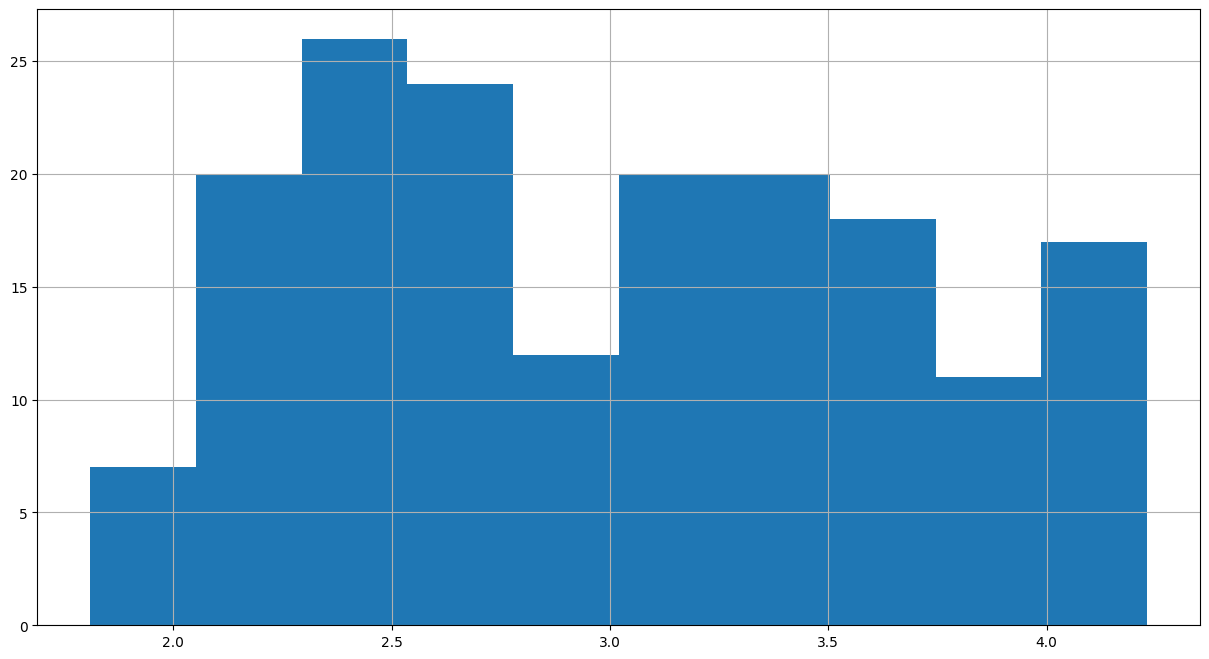

In [35]:
df1['age'].hist();

In [27]:
#nous regardons uniquement les critères de notation
df1[['noteFinale', 'ergoDesign', 'ecran', 'perfs', 'photo', 'audio', 'autonomie', 'reparabilite', 'durabilite']].mean().sort_values(ascending = False)

ecran           4.377143
autonomie       4.268571
perfs           4.171429
ergoDesign      3.794286
noteFinale      3.737143
photo           3.508571
audio           3.472973
reparabilite    3.136752
durabilite      2.612245
dtype: float64

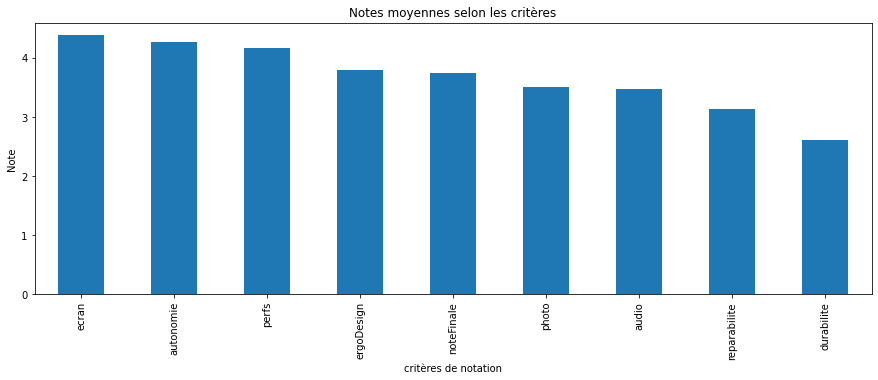

In [28]:
df1[['noteFinale', 'ergoDesign', 'ecran', 'perfs', 'photo', 'audio', 'autonomie', 'reparabilite', 'durabilite']].mean().sort_values(ascending = False).plot.bar(ylabel = 'Note', xlabel = 'critères de notation', figsize=(15,5), title ='Notes moyennes selon les critères');


Si l'on regarde dans la globalité, les téléphones sont plus performants en terme `d'écran, d'autonomie et de performance` (où la moyenne est supérieur à 4).
En revanche, les notes sont plus critiques concernant la `durabilité`, avec une moyenne de 2,61 environ. 

### 1.c\ En comparant les variables prix0, prix50 et prix100, que pouvez-vous dire de l'évolution des prix dans le temps ?

In [29]:
dfPrixTemps = df1[['prix0', 'prix50', 'prix100']]
dfPrixTemps #dataframe avec uniquement les colonnes sur les prix à 0, 50 et 100 semaines

prix0  prix50  prix100
0    1009.00  700.30   398.98
1     300.25  339.00   179.00
2     386.00  371.00   303.88
3     759.00  526.50   492.94
4     909.00  752.50   522.00
..       ...     ...      ...
170   199.99  285.01   286.99
171   236.39  174.49   193.93
172   354.44  269.04   349.00
173   577.95  499.98   455.52
174   499.00  469.00   577.47

[175 rows x 3 columns]

Réalisons une moyenne globale des prix0, prix50 et prix100 :

In [30]:
dfPrixTemps.mean().to_frame('moyenne')

moyenne
prix0    540.894400
prix50   460.086171
prix100  386.188457

<AxesSubplot:title={'center':'Evolution des prix moyens en 0 à 100 semaines'}, xlabel='0 à 100 semaines', ylabel='prix'>

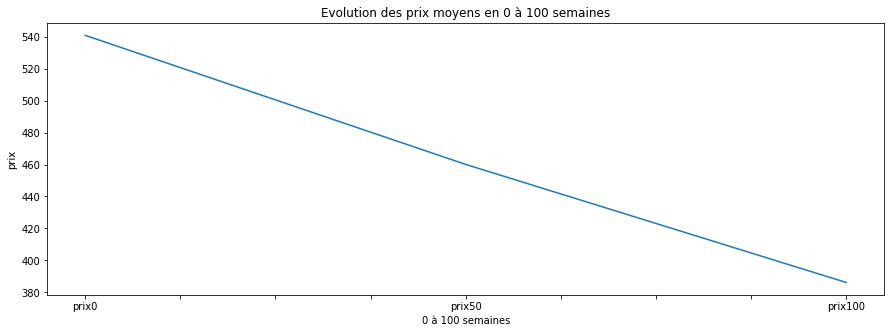

In [31]:
dfPrixTemps.mean().plot( y= 'moyenne', xlabel = '0 à 100 semaines', ylabel = 'prix', figsize = (15,5), title ='Evolution des prix moyens en 0 à 100 semaines')

La tendance majeure va à une **diminution des prix dans le temps.**

### 1.d\ De quand datent les téléphones du jeu de données ?

Dans ce jeu de données, la colonne `age` indique l'age des téléphones, en année, depuis leurs sorties. 

In [32]:
df1.age.sort_values() # référence : novembre 2022

85     1.81
168    1.89
166    1.89
106    1.93
32     1.96
       ... 
88     4.14
0      4.19
87     4.19
118    4.21
55     4.23
Name: age, Length: 175, dtype: float64

Les téléphones du jeu de données ont entre **1,81 et 4,23 ans (soit des dates de parution entre 2018 et 2021 environ)**.

## 2- Ajout des variables `reduction50` et `reduction100`

In [33]:
#pourcentage de décroissance entre les semaines 0 et 50
df1["reduction50"] = ((df1.prix50-df1.prix0)/df1.prix0)*100
#pourcentage de décroissance entre les semaines 50 et 100
df1["reduction100"] = ((df1.prix100-df1.prix50)/df1.prix50)*100
df1

url  \
0    https://www.lesnumeriques.com/telephone-portab...   
1    https://www.lesnumeriques.com/telephone-portab...   
2    https://www.lesnumeriques.com/telephone-portab...   
3    https://www.lesnumeriques.com/telephone-portab...   
4    https://www.lesnumeriques.com/telephone-portab...   
..                                                 ...   
170  https://www.lesnumeriques.com/telephone-portab...   
171  https://www.lesnumeriques.com/telephone-portab...   
172  https://www.lesnumeriques.com/telephone-portab...   
173  https://www.lesnumeriques.com/telephone-portab...   
174  https://www.lesnumeriques.com/telephone-portab...   

                          nom   marque   age  noteFinale  ergoDesign  ecran  \
0       Samsung Galaxy Note 9  Samsung  4.19         5.0         5.0    5.0   
1    Samsung Galaxy A7 (2018)  Samsung  3.96         4.0         3.0    5.0   
2    Samsung Galaxy A9 (2018)  Samsung  3.73         4.0         4.0    5.0   
3         Samsung Galaxy S10e  Samsung  3.64         4.0         5.0    5.0   
4          Samsung Galaxy S10  Samsung  3.64         4.0         5.0    5.0   
..                        ...      ...   ...         ...         ...    ...   
170              Realme 5 Pro   Realme  2.78         4.0         4.0    4.0   
171                  Realme 6   Realme  2.50         3.0         4.0    4.0   
172              Realme 6 Pro   Realme  2.47         4.0         4.0    4.0   
173         Realme X50 Pro 5G   Realme  2.43         4.0         4.0    5.0   
174      Realme X3 Super Zoom   Realme  2.38         3.0         3.0    4.0   

     perfs  photo  audio  autonomie  reparabilite  durabilite    prix0  \
0      5.0    5.0    5.0        4.0           NaN         NaN  1009.00   
1      4.0    3.0    4.0        5.0           NaN         NaN   300.25   
2      4.0    3.0    4.0        5.0           NaN         NaN   386.00   
3      5.0    4.0    5.0        3.0           3.0         NaN   759.00   
4      5.0    5.0    5.0        3.0           1.0         NaN   909.00   
..     ...    ...    ...        ...           ...         ...      ...   
170    5.0    3.0    NaN        5.0           NaN         NaN   199.99   
171    5.0    2.0    NaN        5.0           1.0         1.0   236.39   
172    5.0    3.0    NaN        5.0           3.0         2.0   354.44   
173    5.0    4.0    NaN        5.0           3.0         2.0   577.95   
174    5.0    3.0    NaN        4.0           1.0         1.0   499.00   

     prix50  prix100                                           urlImage  \
0    700.30   398.98  https://cdn.lesnumeriques.com/optim/produits/3...   
1    339.00   179.00  https://cdn.lesnumeriques.com/optim/produits/3...   
2    371.00   303.88  https://cdn.lesnumeriques.com/optim/produits/3...   
3    526.50   492.94  https://cdn.lesnumeriques.com/optim/product/50...   
4    752.50   522.00  https://cdn.lesnumeriques.com/optim/produits/3...   
..      ...      ...                                                ...   
170  285.01   286.99  https://cdn.lesnumeriques.com/optim/product/53...   
171  174.49   193.93  https://cdn.lesnumeriques.com/optim/product/56...   
172  269.04   349.00  https://cdn.lesnumeriques.com/optim/product/56...   
173  499.98   455.52  https://cdn.lesnumeriques.com/optim/product/55...   
174  469.00   577.47  https://cdn.lesnumeriques.com/optim/product/57...   

     reduction50  reduction100  
0     -30.594648    -43.027274  
1      12.905912    -47.197640  
2      -3.886010    -18.091644  
3     -30.632411     -6.374169  
4     -17.216722    -30.631229  
..           ...           ...  
170    42.512126      0.694712  
171   -26.185541     11.141040  
172   -24.094346     29.720488  
173   -13.490786     -8.892356  
174    -6.012024     23.127932  

[175 rows x 19 columns]

Prenons la première ligne, `prix0 = 1009, reduction = -30.594648`. Cela reviendrait donc à faire :

**prix50 = 1009 * (1 + (- 0,30594648)) = 700,30.** Il s'agit bien d'une réduction d'environ 31%. 

#### Test statistique :

Nous testons $H_0$ = 'les variables `reduction50` et `reduction100` proviennent d'une loi normale'.

In [34]:
pg.normality(df1.reduction50)

W      pval  normal
reduction50  0.946359  0.000004   False

In [35]:
pg.normality(df1.reduction100)

W          pval  normal
reduction100  0.735261  2.038892e-16   False

Ce test invalide l'hypothèse $H_0$. Ici la p-valeur est inférieur à 5%, on rejette donc l'hypothèse, comme le suggère la mention False dans le résultat.
Les distributions de ces 2 variables ne peuvent donc pas provenir d'une loi normale, le test est significatif.

## 3 - Quels sont les magasins les plus et les moins recommandés ?

Nous supposons qu'un magasin est recommandé lorsque le site `lesnumériques.com` affiche le prix de vente du magasin en question sur une date donnée et sur un modèle particulier. Dans le dataframe `historiquePrix.data`, chaque ligne représente un modèle de téléphone à une date, avec les prix de différents magasins recommandés. Nous regardons donc le nombre d'occurence de ces magasins dans nos données afin de savoir s'ils sont souvent recommandés ou pas par le site. 

### Inspection du pourcentage de valeurs manquantes de `historiquePrix.data`

Nous avons appris dans la préparation de données que ce dataframe a **16626 lignes.** 

In [36]:
dfValeurManq = df2.isnull().sum()/16626*100 #calcul du rapport de valeurs nulles sur le nombre de lignes
dfValeurManq.sort_values(ascending = False)

reconditionne: Fnac.com            99.651149
reconditionne: Amazon              99.151931
Carrefour                          98.995549
marketplace: Rue du commerce       98.544448
marketplace: La Redoute            97.630218
occasion: Darty.com Marketplace    97.179117
E. Leclerc - High-Tech             96.613738
marketplace: Conforama             95.693492
occasion: Cdiscount Marketplace    95.344641
Auchan                             94.905570
Conforama                          90.923854
occasion: eBay                     90.653194
marketplace: Mistergooddeal        85.727174
Electro Depot                      84.518224
reconditionne: reBuy               81.119933
Ubaldi                             80.223746
reconditionne: Back Market         78.876459
marketplace: Fnac.com              75.321785
reconditionne: Amazon Warehouse    71.249850
LDLC                               64.296884
Materiel.net                       64.038253
occasion: Amazon Marketplace       62.835318
Boulanger 

On peut voir qu'il manque des données pour beaucoup de variables (i.e beaucoup de magasins). Cela peut etre du au fait qu'un téléphone n'est pas forcément vendu dans toutes les boutiques. On peut supposer que : les téléphones récents ne sont pas vendus sur les sites d'occasion et de reconditionnements. 

Nous allons cependant décider qu'un prix de magasin affiché sur `lesnumeriques.com` implique une recommandation du magasin en question.

### Magasins les +/- recommandés

Afin de savoir quels magasins sont les plus ou moins recommandés, nous créons un dataframe dans lequel nous comptons les non-absences de données pour chaque variables (autrement dit, nous regardons le nombre de données renseignées pour chaque magasin).

In [37]:
dfNonVides = df2.count().to_frame('données')
dfNonVides

données
url                                16626
date                               16626
dateDetaillee                      16626
Amazon                              7209
Auchan                               847
Boulanger                           6519
Carrefour                            167
Cdiscount                           6928
Conforama                           1509
Darty.com                           8531
E. Leclerc - High-Tech               563
Electro Depot                       2574
Fnac.com                            7506
La Redoute                          8868
LDLC                                5936
Materiel.net                        5979
Rue du Commerce                     6561
Ubaldi                              3288
marketplace: Amazon                12469
marketplace: Cdiscount              9460
marketplace: Conforama               716
marketplace: Darty                  9990
marketplace: Fnac.com               4103
marketplace: La Redoute              394
marketplace: Mistergooddeal         2373
marketplace: Rakuten               14154
marketplace: Rue du commerce         242
reconditionne: Amazon                141
reconditionne: Amazon Warehouse     4780
reconditionne: Back Market          3512
reconditionne: Fnac.com               58
reconditionne: reBuy                3139
occasion: Amazon Marketplace        6179
occasion: Cdiscount Marketplace      774
occasion: Darty.com Marketplace      469
occasion: eBay                      1554
occasion: Fnac.com Marketplace      6611
prixMin                            16626
prixMax                            16626
prixMoyen                          16626

Nous supprimons ensuite de notre dataframe les variables qui ne nous intéressent pas (ici, ce sont toutes celles qui ne sont pas des magasins).

In [38]:
dfNonVides = dfNonVides.drop(index = ['url', 'date', 'dateDetaillee', 'prixMin','prixMax', 'prixMoyen'])

Et nous construisons un diagramme en barre (en prenant soin de les transformer en pourcentage et en les triant  dans l'ordre grâce à un `.sort_values()`).

<AxesSubplot:title={'center':'Pourcentage des valeurs manquantes'}, ylabel='pourcentage de valeurs vides'>

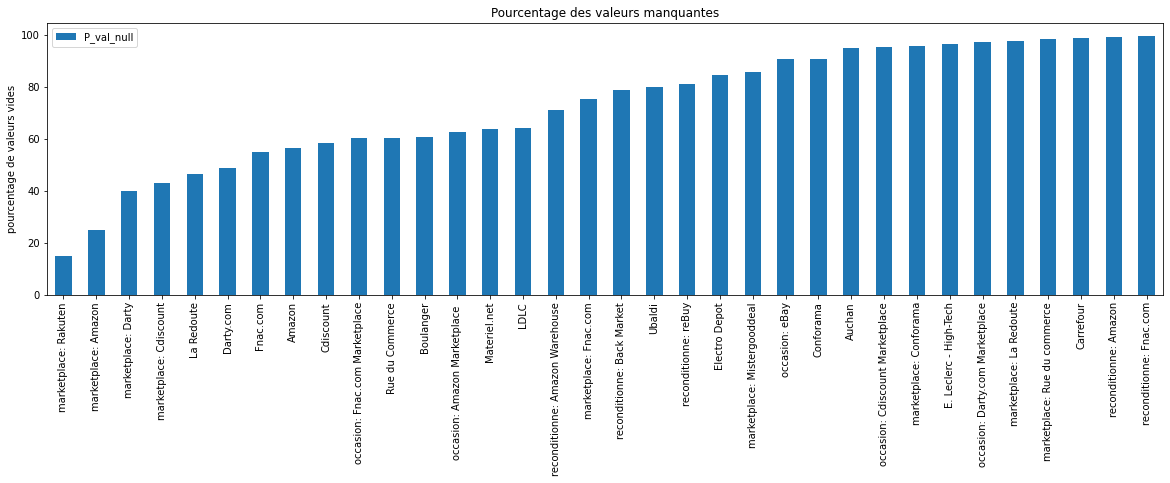

In [39]:
dfNonVides['P_val_null'] = (((16626 - dfNonVides.données)/16626))*100
dfNonVides.sort_values(by = 'P_val_null').plot.bar(title = 'Pourcentage des valeurs manquantes', y = 'P_val_null', figsize = (20,5), ylabel = 'pourcentage de valeurs vides')

**A l'inverse, nous pouvons également calculer le pourcentage de données manquantes et obtenir le pourcentage de données non manquantes.**

<AxesSubplot:title={'center':'Pourcentage des valeurs non-vides'}, ylabel='pourcentage de valeurs'>

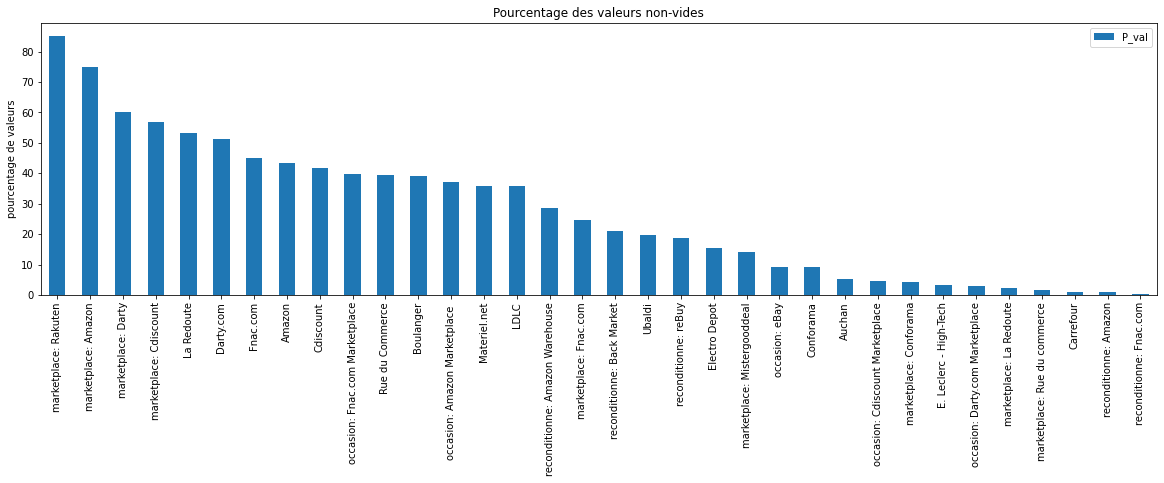

In [40]:
dfVides = df2.isna().sum().to_frame('données')
dfVides = dfVides.drop(index = ['url', 'date', 'dateDetaillee', 'prixMin','prixMax', 'prixMoyen'])
dfVides['P_val'] = (((16626 - dfVides.données)/16626))*100
dfVides.sort_values(by = 'P_val', ascending=False).plot.bar(title = 'Pourcentage des valeurs non-vides',y = 'P_val', figsize = (20,5), ylabel = 'pourcentage de valeurs')

Ainsi, nous voyons que les magasins les plus recommandés sont le **marketplace de Rakuten et le marketplace d'Amazon** puisque ce sont ceux qui ont le moins de valeurs manquantes. En revanche, les téléphones **reconditionnés de la Fnac et d'amazon** sont très peut recommandés puisque ce sont ceux qui ont le plus de valeures manquantes.

# III- Questions du domaine

Pour faciliter la manipulation de nos données, nous effectuons une jointure entre nos deux dataframes (`telephones.data` et `historiquePrix.data`) et nous supprimons les variables qui ne nous intéressent plus (les magasins, l'URL Image)

In [41]:
df = df1.merge(df2, on = 'url') #merge sur les URL car un téléphone = Une URL

In [42]:
df = df.drop(['urlImage','Amazon', 'Auchan',
       'Boulanger', 'Carrefour', 'Cdiscount', 'Conforama', 'Darty.com',
       'E. Leclerc - High-Tech', 'Electro Depot', 'Fnac.com', 'La Redoute',
       'LDLC', 'Materiel.net', 'Rue du Commerce', 'Ubaldi',
       'marketplace: Amazon', 'marketplace: Cdiscount',
       'marketplace: Conforama', 'marketplace: Darty', 'marketplace: Fnac.com',
       'marketplace: La Redoute', 'marketplace: Mistergooddeal',
       'marketplace: Rakuten', 'marketplace: Rue du commerce',
       'reconditionne: Amazon', 'reconditionne: Amazon Warehouse',
       'reconditionne: Back Market', 'reconditionne: Fnac.com',
       'reconditionne: reBuy', 'occasion: Amazon Marketplace ',
       'occasion: Cdiscount Marketplace', 'occasion: Darty.com Marketplace',
       'occasion: eBay', 'occasion: Fnac.com Marketplace'], axis = 1) #Nous n'avons plus besoin des magasins. 

In [43]:
df.columns #les colonnes restantes

Index(['url', 'nom', 'marque', 'age', 'noteFinale', 'ergoDesign', 'ecran',
       'perfs', 'photo', 'audio', 'autonomie', 'reparabilite', 'durabilite',
       'prix0', 'prix50', 'prix100', 'reduction50', 'reduction100', 'date',
       'dateDetaillee', 'prixMin', 'prixMax', 'prixMoyen'],
      dtype='object')

## 1 - Quelles marques sont globalement les plus chères ? Les moins chères ?

Nous regroupons dans un dataframe les marques grâce à un `groupby()` et nous effecutons une moyenne des prix moyens grâce à un `mean()`

In [44]:
df.groupby('marque').mean().prixMoyen.to_frame('prixMoyen') #moyenne prix moyen par marque

prixMoyen
marque              
Apple     892.099445
Google    548.143052
Honor     294.199784
Huawei    436.235448
Motorola  420.391064
Nokia     263.783106
OnePlus   600.184576
Oppo      415.283766
Realme    382.411173
Samsung   595.527998
Sony      540.580817
Xiaomi    291.263095

Et nous en faisons un `barplot` en triant les valeurs dans un ordre decroissant grâce à un `sort_values()` pour faciliter la lecture :

<AxesSubplot:title={'center':'Prix Moyen par marque'}, xlabel='marque'>

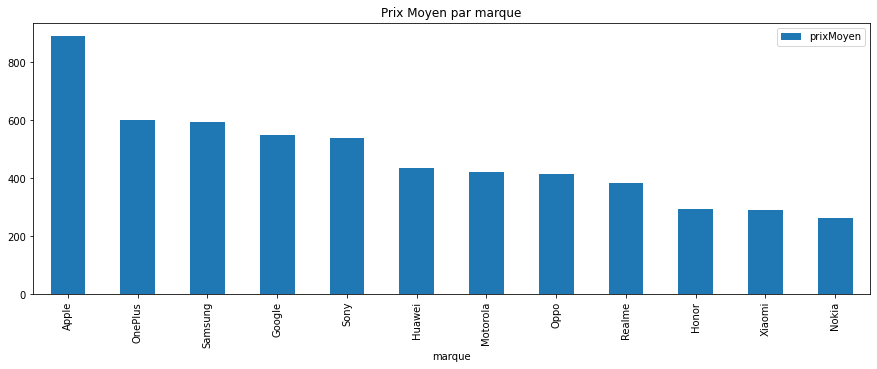

In [45]:
df.groupby('marque').mean().prixMoyen.to_frame('prixMoyen').sort_values(by = 'prixMoyen', ascending = False).plot.bar(y = 'prixMoyen', figsize = (15,5),title ='Prix Moyen par marque')



Les marques les plus chères sont respectivement **Apple, OnePlus et Samsung**, tandis que les moins chère sont **Nokia, Xiaomi et Honor**.

## 2 - Au sens de la note finale, quelles sont les pires et les meilleures marques ?

En suivant la même logique que la question précédente : 

In [46]:
dfNoteMarque = df.groupby('marque').mean().noteFinale.to_frame('Notefinale')
dfNoteMarque #moyenne des notes par marque

Notefinale
marque              
Apple       4.363636
Google      4.660116
Honor       3.425685
Huawei      3.639727
Motorola    3.212808
Nokia       2.802906
OnePlus     4.201087
Oppo        3.715005
Realme      3.816112
Samsung     3.916416
Sony        3.416115
Xiaomi      3.754705

<AxesSubplot:title={'center':'Note finale moyenne par marque'}, xlabel='marque'>

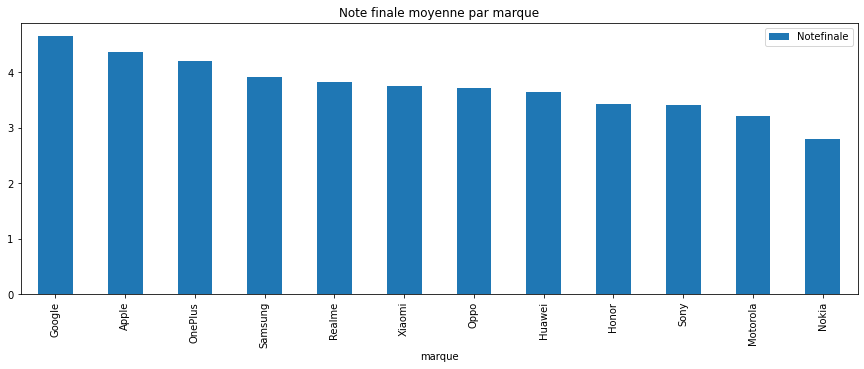

In [47]:
dfNoteMarque.sort_values(by = 'Notefinale', ascending = False).plot.bar(y = 'Notefinale', figsize = (15,5), title ='Note finale moyenne par marque' )

Les marques les mieux notées sont respectivement **Google, Apple et OnePlus**, tandis que les marques les moins bien notées sont **Nokia, Motorola et Sony**. Cela est globalement en adéquation avec la distribution des prix que nous pouvions voir dans la question précédente : plus les téléphones sont chers, mieux ils sont notés même si nous constatons quelques exception notamment pour Google par exemple qui ne se classe pas parmis les téléphones les plus chers mais qui est pourtant très bien noté). Nous pouvons aussi nous demander si ils les téléphones ne sont justement pas plus cher en raison de leur bonne notation. 

## 3 - A l'aide des variables créées précédemment, indiquez quelles marques présentent les prix qui décroissent le plus/le moins entre les semaines 0 et 50, entre les semaines 50 et 100.

Toujours selon la même logique :

In [48]:
df50 = df.groupby('marque').mean().reduction50.to_frame('semaine50')
df50 #moyenne des reduction par marque

semaine50
marque             
Apple    -11.983831
Google     4.758883
Honor    -16.323675
Huawei   -16.306306
Motorola -14.911959
Nokia     -1.514497
OnePlus  -14.297915
Oppo     -16.118779
Realme    -6.663722
Samsung  -16.200411
Sony     -11.195490
Xiaomi   -10.373895

<AxesSubplot:title={'center':'Evolution des prix de 0 à 50 semaines'}, xlabel='marque'>

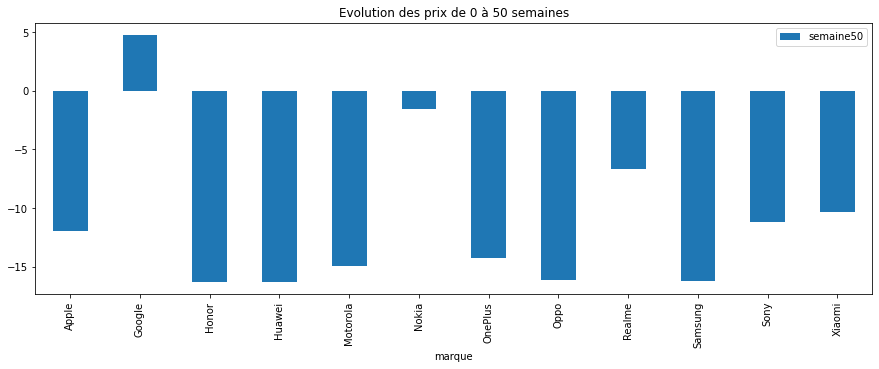

In [49]:
df50.plot.bar(figsize = (15,5), title = 'Evolution des prix de 0 à 50 semaines')

Entre les semaines 0 et 50, la marque **Google présente les prix qui décroissent le moins** et la marque **Honor présente les prix qui décroissent le plus**.

In [50]:
df100 = df.groupby('marque').mean().reduction100.to_frame('semaine100')
df100

semaine100
marque              
Apple     -12.509140
Google    -36.056357
Honor      15.632135
Huawei     15.833007
Motorola    7.462192
Nokia      -5.648428
OnePlus   -21.623974
Oppo       -0.087414
Realme     16.992606
Samsung   -20.722069
Sony      -17.817539
Xiaomi     -6.328064

<AxesSubplot:title={'center':'Evolution des prix de 50 à 100 semaines'}, xlabel='marque'>

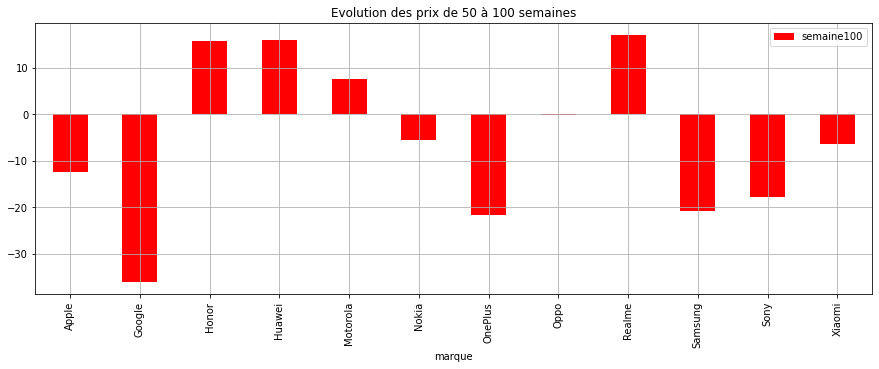

In [100]:
df100.plot.bar(figsize = (15,5), color ='red', title = 'Evolution des prix de 50 à 100 semaines', grid=True)

Entre les semaines 50 et 100, la marque **Realme présente les prix qui décroissent le moins** et la marque **Google présente les prix qui décroissent le plus**. Les courbes de décroissances de Google nous paraissent donc assez surprenantes puisque nous constatons une tendance inverse à la semaine 50, mais cela s'explique aussi par le fait que google a été la seule marque a accroitre son prix entre les semaines 0 et 50, donc sa décroissance parait d'autant plus importante entre les semaines 50 et 100. 

## 4 - Pour le modèle de téléphone de votre choix, représentez l'évolution de prixMin, prixMoyen et prixMax dans le temps. Afin que l'échelle temporelle soit plus informative, mettez en abscisses la vraie date et non le numéro de la semaine.

Nous avons choisi de nous baser sur le modèle de télephone Apple iPhone 11. Pour cela, nous regroupons grâce à `query` toutes les lignes qui concernent ce modèle de téléphone. Nous effectuons un `plot` avec comme axe des x les dates détaillées et comme axe des y les montant des prix (minimums, moyens et maximums). 

<AxesSubplot:title={'center':'Evolution du prix de Apple iPhone 11 dans le temps'}, xlabel='Dates', ylabel='prix'>

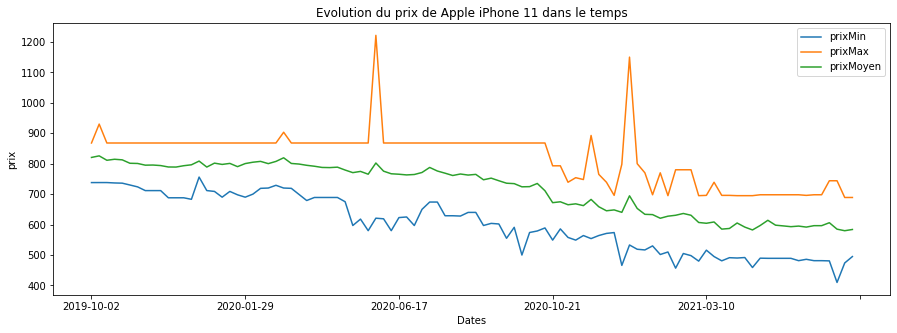

In [52]:
df.query('nom == "Apple iPhone 11"').plot(x = "dateDetaillee", title = 'Evolution du prix de Apple iPhone 11 dans le temps', xlabel='Dates',ylabel = 'prix', y = ["prixMin", "prixMax", "prixMoyen"] ,figsize = (15,5) )

Nous remarquons que globalement, la moyenne du prix de l'iPhone 11 suit la tendance globale: le prix tend à diminuer au fil du temps. Cependant, nous remarquons certains "pics" flagrants, notamment vers début juin 2020 et décembre/janvier 2021 avec des prix maximums pouvant aller jusqu'à 1200€, soit des centaines d'euros de plus que la moyenne. Nous remarquons aussi paradoxallement à ces même périodes, des "creux" avec des prix minimums bien en dessous de la moyenne. Ces phénomènes opposés ont finalement recrées un équilibre quant au prix moyen. 

## 5 - Même question pour le téléphone "Oppo A53". Utilisez les données pour tenter d'expliquer le comportement du prix sur la fin de la période d'analyse.

Nous regroupons grâce à `query` toutes les lignes qui concernent le modèle "Oppo A53". Nous effectuons un `plot` avec comme axe des x les dates détaillées et comme axe des y les montant des prix (minimums, moyens et maximums).

<AxesSubplot:title={'center':'Evolution du prix de Oppo A53 dans le temps'}, xlabel='Dates', ylabel='prix'>

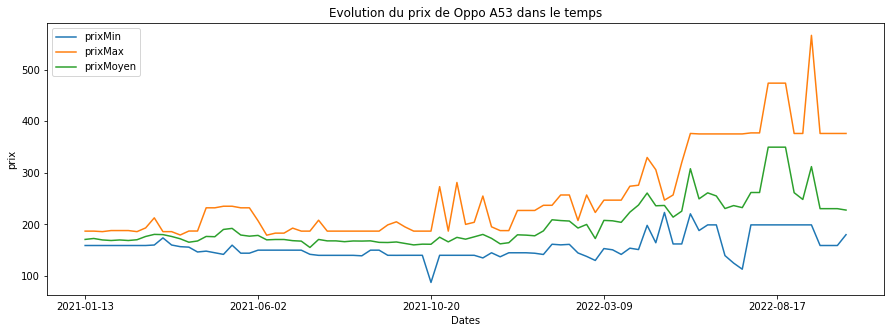

In [53]:
df.query('nom == "Oppo A53"').plot(x = "dateDetaillee", y = ["prixMin", "prixMax", "prixMoyen"], title = 'Evolution du prix de Oppo A53 dans le temps', xlabel='Dates',ylabel = 'prix', figsize = (15,5) )

Nous pouvons constater que le prix moyen du Oppo A53 ne suit pas la tendance globale : son prix tend à augmenter au fil du temps et non à diminuer. Nous remarquons une montée progressive mais qui s'accentue d'autant plus à partir de mars 2022. Il y a également quelques périodes où, comme pour l'iPhone 11, le prix maximum de ce modèle a flambé et où à l'inverse les prix minimums de ce modèle ont aussi diminué. Nous remarquons donc finalement le même phénomène que pour l'iPhone 11 : des prix excessifs aussi bien élevés que bas ont lieu globalement aux mêmes moment et rééquilibre le prix moyen.

## 6 - On imagine que vous étiez prêt(e) à acheter un des téléphones du jeu de données à sa sortie. Choisissez une fourchette de prix pas trop large et une note cible, puis indiquez les marques ou les modèles qui répondaient à votre besoin.

In [54]:
for idx,column in enumerate(df.columns):
...     print(idx,column)
#pour nous aider à avoir le numéro de colonne associé à son nom

0 url
1 nom
2 marque
3 age
4 noteFinale
5 ergoDesign
6 ecran
7 perfs
8 photo
9 audio
10 autonomie
11 reparabilite
12 durabilite
13 prix0
14 prix50
15 prix100
16 reduction50
17 reduction100
18 date
19 dateDetaillee
20 prixMin
21 prixMax
22 prixMoyen


Nous partons du principe que nous cherchons un téléphone qui soit entre **400 et 650€ et qui ait une note finale supérieure à 3,5**.

Nous créons un dataframe de nos choix potentiels en prenant soin de ne garder que les variables qui nous intéressent et en supprimant tous les doublons.

In [55]:
dfIdeal= df.query('prix0 >= 400 & prix0 <= 650 & noteFinale > 3.5').iloc[:,[1,2,4,13]].drop_duplicates()
dfIdeal

nom    marque  noteFinale   prix0
1485            Samsung Galaxy A71   Samsung         4.0  479.00
1585   Samsung Galaxy Note 10 Lite   Samsung         4.0  610.80
3522            Google Pixel 3a XL    Google         5.0  546.19
3999                Google Pixel 5    Google         5.0  629.00
4093            Google Pixel 4a 5G    Google         5.0  479.00
5372                   Xiaomi Mi 8    Xiaomi         4.0  467.10
5472               Xiaomi Mi Mix 3    Xiaomi         4.0  529.90
5556               Xiaomi Mi 8 Pro    Xiaomi         4.0  595.75
5925                   Xiaomi Mi 9    Xiaomi         5.0  501.50
6406              Xiaomi Mi 9T Pro    Xiaomi         5.0  429.00
6706             Xiaomi Mi Note 10    Xiaomi         5.0  549.45
7989             Xiaomi Mi 10T Pro    Xiaomi         4.0  591.14
8672                Huawei Mate 20    Huawei         4.0  559.00
9862                    Huawei P40    Huawei         5.0  649.00
10626                Honor View 20     Honor         4.0  549.00
10926                     Honor 20     Honor         4.0  499.00
13127                   OnePlus 6T   OnePlus         5.0  559.00
13316                    OnePlus 7   OnePlus         5.0  609.00
13406                   OnePlus 7T   OnePlus         4.0  599.00
14393            Motorola One Zoom  Motorola         4.0  445.09
14765                Motorola Edge  Motorola         4.0  599.00
15062                    Oppo Reno      Oppo         4.0  499.00
15517            Oppo Find X2 Lite      Oppo         4.0  449.00
16055                Realme X2 Pro    Realme         5.0  436.80
16428            Realme X50 Pro 5G    Realme         4.0  577.95

In [95]:
dfIdeal.groupby('marque').size()

marque
Google      3
Honor       2
Huawei      2
Motorola    2
OnePlus     3
Oppo        2
Realme      2
Samsung     2
Xiaomi      7
dtype: int64

<AxesSubplot:title={'center':'La répartition des téléphones qui répondent à nos critères'}>

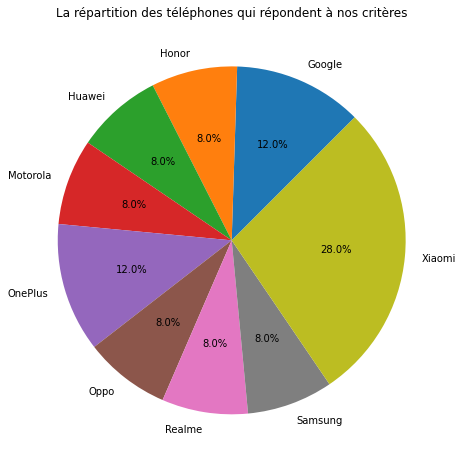

In [99]:
dfIdeal.groupby('marque').size().plot(kind = 'pie', autopct = lambda x: str(round(x, 2)) + '%', title = 'La répartition des téléphones qui répondent à nos critères', ylabel = '', startangle=45)

Nous obtenons ainsi plusieurs modèles de téléphones qui correspondent à nos critères. Nous avons cependant plus de recommandation de téléphone de la marque `Xiaomi`. Nous pouvons voir qu'aucun téléphone `Apple` ne rentre dans nos critères, nous avons vu dans les questions précédentes qu'il s'agit de la marque la plus chère. 

## 7) Représentez l'évolution dans le temps (sur les 100 semaines) du prix moyen des téléphones en fonction des différents niveaux de noteFinale (avec une couleur de courbe pour chaque niveau de note). Le prix moyen est en fait ici la moyenne des prixMoyen.

Tout d'abord, grâce à un **groupby()**, nous sortons une liste des notes finales attribuées.

In [56]:
df.groupby('noteFinale').size() #connaitre les différentes notes attribuées

noteFinale
1.0      89
2.0     659
3.0    5874
4.0    6595
5.0    3409
dtype: int64

Ensuite, pour chaque note attribuée, nous faisons la moyenne des prix Moyen sur `date` (représente chaque numéro de semaine) et nous affichons toutes les données dans un `plot`. Etant donné que nous souhaitons tout afficher dans le même graphique, nous utilisons `pyplot (plt)`.

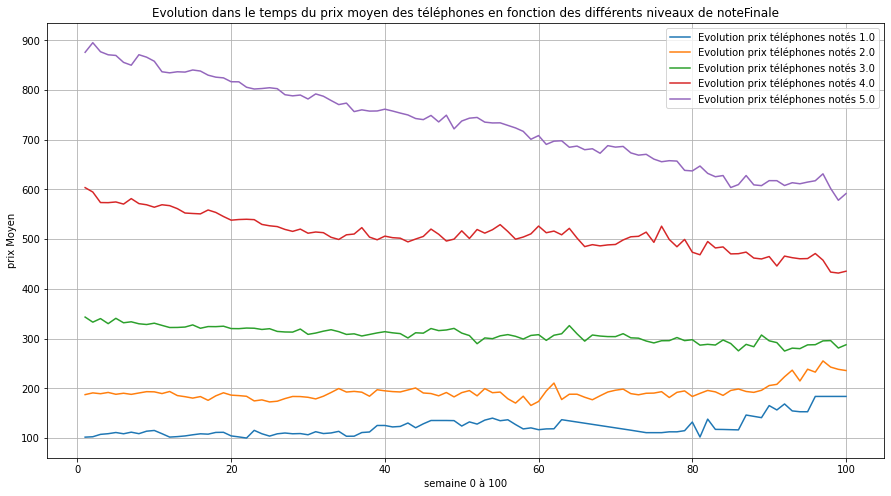

In [57]:
plt.plot(df.query('noteFinale == 1.0').groupby(['date']).mean().prixMoyen, label ='Evolution prix téléphones notés 1.0') #prix des téléphones notés 1.0
plt.plot(df.query('noteFinale == 2.0').groupby(['date']).mean().prixMoyen, label ='Evolution prix téléphones notés 2.0') #prix des téléphones notés 2.0
plt.plot(df.query('noteFinale == 3.0').groupby(['date']).mean().prixMoyen, label ='Evolution prix téléphones notés 3.0') #prix des téléphones notés 3.0
plt.plot(df.query('noteFinale == 4.0').groupby(['date']).mean().prixMoyen, label ='Evolution prix téléphones notés 4.0') #prix des téléphones notés 4.0
plt.plot(df.query('noteFinale == 5.0').groupby(['date']).mean().prixMoyen, label ='Evolution prix téléphones notés 5.0') #prix des téléphones notés 5.0

plt.legend() #afficher la légende
plt.title('Evolution dans le temps du prix moyen des téléphones en fonction des différents niveaux de noteFinale')
plt.xlabel("semaine 0 à 100") #axe des x
plt.ylabel("prix Moyen") #axe des y
plt.grid() #permet de mieux visulaiser les tendances et de mieux voir des pentes pour pouvoir comparer
plt.show()

On peut dire que les téléphones les mieux notés (5.0, ligne violette) ont tendance à perdre en valeur de 0 à 100 semaines. A l'inverse, les téléphones notés 1.0 ou 2.0 reprennent de la valeur vers 100 semaines. Les téléphones notés 3.0 ont une tendance à garder des prix constants, tandis que les téléphones notés 4.0 connaissent une évolution décroissante vers 100 semaines. 

La pente est plus marquée pour les téléphones notés 5.0 avec une tendance décroissante. 

## 8) Dans les données telephones.data, ajoutez une nouvelle variable quantifiant pour chaque modèle la dispersion de ses prix. Pour calculer cela, vous vous baserez sur la variable prixMoyen des données historiquePrix.data. Puis identifiez le téléphone qui possède la plus grande dispersion de prix.

Afin de connaitre la dispersion des prix, nous calculons l'écart-type. Nous décidons de calculer l'écrat-type et non la variance car nous trouvons cela plus simple

Dans les données `telephones.data`, nous allons donc calculer les dispersions selon `prix0`, `prix50` et `prix100`. Nous créons un dataframe avec ces colonnes la. 

In [86]:
dfDispersionPrix = df1[['nom', 'prix0', 'prix50', 'prix100']] 
dfDispersionPrix['ecart-type'] = dfDispersionPrix[['nom', 'prix0', 'prix50', 'prix100']].std(axis=1)
dfDispersionPrix['moyenne'] = dfDispersionPrix[['nom', 'prix0', 'prix50', 'prix100']].mean(axis=1)
dfDispersionPrix['variance'] = dfDispersionPrix[['nom', 'prix0', 'prix50', 'prix100']].var(axis=1)


dfDispersionPrix.drop_duplicates().sort_values(by='ecart-type', ascending= False).head()


/var/folders/yp/g45gsv855nxd7mqc7rydjwvm0000gn/T/ipykernel_41633/615243820.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfDispersionPrix['ecart-type'] = dfDispersionPrix[['nom', 'prix0', 'prix50', 'prix100']].std(axis=1)
/var/folders/yp/g45gsv855nxd7mqc7rydjwvm0000gn/T/ipykernel_41633/615243820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDispersionPrix['ecart-type'] = dfDispersionPrix[['nom', 'prix0', 'prix50', 'prix100']].std(axis=1)
/var/folders/yp/g45gsv855nxd7mqc7rydjwvm0000gn/T/ipykernel_41633/615243820.py:3: FutureWarning: Dropping of nuisance columns in Da

nom   prix0   prix50  prix100  ecart-type  \
29   Samsung Galaxy Z Fold 2  2020.0  1915.49  1052.64  530.913965   
105       Huawei Mate 40 Pro  1199.0  1434.97   658.29  398.179392   
90        Huawei Mate 20 Pro   803.9    85.90   332.35  364.833525   
162         Oppo Find X2 Pro  1199.0   699.00   489.00  364.737348   
35         Google Pixel 3 XL   813.0   959.00   307.00  342.163704   

         moyenne       variance  
29   1662.710000  281869.638700  
105  1097.420000  158546.827900  
90    407.383333  133103.500833  
162   795.666667  133033.333333  
35    693.000000  117076.000000

Nous constatons en calculant l'écart-type et la variance que le `Samsung Galaxy Z Fold 2` a la plus grande dispersion car sa variance (et son écart-type) est la plus élevée. En effet, plus la variance est élevée, plus les données sont dispersées. 

Nous comparons ensuite **cette variance avec la variance des prix moyens**. Ici, les données sont en lignes. Nous faisons un `groupby()` par marque, puis nous calculons la moyenne des prix moyens de chaque marque, l'écart-type et la variance.

In [87]:
dfDispersionPrix2 = df.groupby('nom').std().prixMoyen.to_frame('ecart-type')
dfDispersionPrix2['moyenne'] = df.groupby('nom').mean().prixMoyen.to_frame()
dfDispersionPrix2['variance'] = df.groupby('nom').var().prixMoyen.to_frame()

dfDispersionPrix2.sort_values(by='ecart-type', ascending = False).head()

ecart-type      moyenne       variance
nom                                                                   
Samsung Galaxy Z Fold 2         341.343075  1529.929400  116515.094866
Samsung Galaxy Z Flip           316.227737  1255.237872   99999.981464
Huawei Mate 40 Pro              294.657942  1053.845000   86823.302953
OnePlus 7T Pro McLaren Edition  222.940154  1148.070290   49702.312135
Google Pixel 3 XL               182.076532   687.790612   33151.863511

Nous constatons que le `Samsung Galaxy Z Fold 2` a également la plus grande dispersion sur les prix moyens car sa variance (et son écart-type) est la plus élevée.

On peut ainsi conclure que le `Samsung Galaxy Z Fold 2` a bien la plus grande dispersion de prix, que ce soit sur ses prix de `0 à 100 semaines` ou sur `son prix moyen`.

# III- Analyse bidimensionnelle

## 1 -  Réalisez l'analyse descriptive bidimensionnelle des données telephones.data. Commentez. Afin de limiter le nombre de variables, vous exclurez de l'analyse les huit notes détaillées, la seule note conservée est la note finale.

In [62]:
df1.columns

Index(['url', 'nom', 'marque', 'age', 'noteFinale', 'ergoDesign', 'ecran',
       'perfs', 'photo', 'audio', 'autonomie', 'reparabilite', 'durabilite',
       'prix0', 'prix50', 'prix100', 'urlImage', 'reduction50',
       'reduction100'],
      dtype='object')

Nous gardons dans un nouveau dataframe uniquement les variables qui nous intéressent pour effectuer une matrice d'analyse bidimentionnelle pour identifier des éventuelles correlations.

In [63]:
df1bidim = df1[['marque', 'age', 'noteFinale','prix0', 'prix50', 'prix100']]

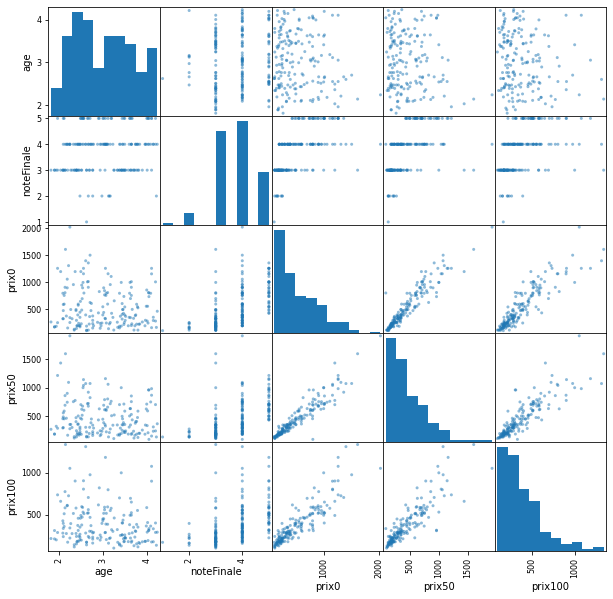

In [64]:
plotting.scatter_matrix(df1bidim, figsize=(10,10));
                             

In [65]:
df1bidim.corr()

age  noteFinale     prix0    prix50   prix100
age         1.000000    0.123425 -0.121477 -0.136995 -0.158914
noteFinale  0.123425    1.000000  0.566944  0.519925  0.450728
prix0      -0.121477    0.566944  1.000000  0.939275  0.894272
prix50     -0.136995    0.519925  0.939275  1.000000  0.870572
prix100    -0.158914    0.450728  0.894272  0.870572  1.000000

Nous remarquons des tendances plutôt linéaires en ce qui concernent les variables de prix. Aussi bien entre les semaines 0 et 50 qu'entre les semaines 50 et 100, et même plus généralement entre les semaines 0 et 100. Ces corrélations sont très fortes puisque leur coeffificents ne descendenten dessous de 0,8 (échelle de Cohen). En revanche, nous remarquons une répartition des points plus diffuse (qui ressemble davanatage à des "nuages patates") entre les variables age et prix.

## 2 - Vérifiez si les corrélations sont significatives. Commentez.

Grâce à un `pariwise_corr()`, nous pouvons voir à combien s'élève la p-valeur pour chaque association possible de variable.

In [66]:
df1bidim.pairwise_corr()

X           Y   method alternative    n         r          CI95%  \
0         age  noteFinale  pearson   two-sided  175  0.123425  [-0.03, 0.27]   
1         age       prix0  pearson   two-sided  175 -0.121477  [-0.27, 0.03]   
2         age      prix50  pearson   two-sided  175 -0.136995  [-0.28, 0.01]   
3         age     prix100  pearson   two-sided  175 -0.158914  [-0.3, -0.01]   
4  noteFinale       prix0  pearson   two-sided  175  0.566944   [0.46, 0.66]   
5  noteFinale      prix50  pearson   two-sided  175  0.519925    [0.4, 0.62]   
6  noteFinale     prix100  pearson   two-sided  175  0.450728   [0.32, 0.56]   
7       prix0      prix50  pearson   two-sided  175  0.939275   [0.92, 0.95]   
8       prix0     prix100  pearson   two-sided  175  0.894272   [0.86, 0.92]   
9      prix50     prix100  pearson   two-sided  175  0.870572    [0.83, 0.9]   

          p-unc       BF10     power  
0  1.036766e-01      0.352  0.371205  
1  1.092856e-01      0.337  0.361437  
2  7.063433e-02      0.478  0.441433  
3  3.568165e-02      0.843  0.558535  
4  2.863292e-16  2.387e+13  1.000000  
5  1.662325e-13    4.8e+10  1.000000  
6  3.871889e-10  2.575e+07  0.999995  
7  2.827165e-82  2.598e+78  1.000000  
8  2.639554e-62  4.957e+58  1.000000  
9  3.613746e-55  4.489e+51  1.000000

`rcorr()`, nous permet de voir si les significativités entre associations sont fortes ou faibles. 

In [67]:
df1bidim.rcorr()

age noteFinale  prix0 prix50 prix100
age              -                                *
noteFinale   0.123          -    ***    ***     ***
prix0       -0.121      0.567      -    ***     ***
prix50      -0.137       0.52  0.939      -     ***
prix100     -0.159      0.451  0.894  0.871       -

Nous remarquons que pour chaque paire d'association de variables possible, celles qui concernent l'age n'ont pas de p-valeur inférieur à 5% sauf lorsque l'âge est associé à la variable prix 100, où la corréaltion est significative mais reste cependant plutôt faible. En revanche, les correlations sont beaucoup plus significatives entre toutes les autres variables : prix0, prix50, prix100 et noteFinale, avec des p-valeur largement inférieures à 5% et des significativités très forte (que nous pouvons constater dans le 2ème tableau). 

## 3 - Choisissez deux marques de téléphones et vérifiez s'il existe un effet significatif de la marque sur la variable prix0.

Nous gardons dans un premier temps dans un nouveau dataframe uniquement les variables marques et prix0, et nous ne gardons que les 2 marques auxuqelles nous avons décidé de nous interesser : **Apple** et **Google**.

In [68]:
df1marque = df1bidim[['marque', 'prix0']].query('marque == ["Apple", "Google"]') #nombre de modèles proche
df1marque

marque    prix0
34  Google   737.02
35  Google   813.00
36  Google   546.19
37  Google   399.00
38  Google   769.00
39  Google   899.00
40  Google   349.00
41  Google   629.00
42  Google   479.00
43   Apple   859.00
44   Apple  1157.00
45   Apple  1259.00
46   Apple  1159.00
47   Apple   811.50
48   Apple  1259.00
49   Apple   489.00
50   Apple  1159.00
51   Apple   909.00
52   Apple  1259.00
53   Apple   809.00

In [69]:
df1marque.shape

(20, 2)

## Pistes de recherches...

Dans un premier temps, nous ne savions pas comment comparer des variables catégoriques contre des vairables numérique, alors nous avions eu pour idée de discretiser les vairables numériques du prix en 3 catégories : faible, moyen, fort. 

In [70]:
dfQcut = pd.qcut(df1marque.prix0, q=3, labels=["faible", "moyen", "fort"]).sort_values().to_frame('indice_prix')
dfQcut

indice_prix
34      faible
49      faible
36      faible
37      faible
42      faible
40      faible
41      faible
47       moyen
43       moyen
38       moyen
35       moyen
39       moyen
53       moyen
52        fort
44        fort
45        fort
46        fort
48        fort
50        fort
51        fort

Nous avons ajouté à ces discretisations catégoriques nos marques, pour ensuite effectuer un test de chi2 afin de savoir s'il existait un effet significatif de la marque sur la variable prix0.

In [71]:
dfQcut['marque'] = df1marque.marque
dfQcut

indice_prix  marque
34      faible  Google
49      faible   Apple
36      faible  Google
37      faible  Google
42      faible  Google
40      faible  Google
41      faible  Google
47       moyen   Apple
43       moyen   Apple
38       moyen  Google
35       moyen  Google
39       moyen  Google
53       moyen   Apple
52        fort   Apple
44        fort   Apple
45        fort   Apple
46        fort   Apple
48        fort   Apple
50        fort   Apple
51        fort   Apple

In [72]:
effectifsAttendus, effectifsObserves, stats = pg.chi2_independence(dfQcut, x='marque', y='indice_prix')
stats

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6775: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6775: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6772: RuntimeWarning: divide by z

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  10.476190  2.0  0.005310  0.723747  0.834016
1        cressie-read  0.666667  10.958431  2.0  0.004173  0.740217  0.851202
2      log-likelihood  0.000000  13.466158  2.0  0.001191  0.820553  0.917889
3       freeman-tukey -0.500000        NaN  2.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000        inf  2.0  0.000000       inf  1.000000
5              neyman -2.000000        NaN  2.0       NaN       NaN       NaN

Ici, nous voyons que la p-valeur est effectivement inférieur à 5%, nous en déduisons qu'il existe bien un effet significatif (nous pouvons également voir cela graphiquement grâce à notre mosaic ci-dessous).

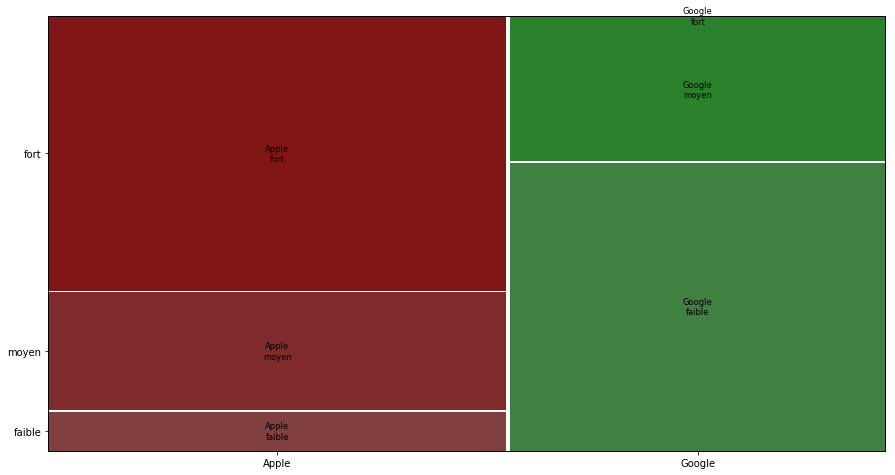

In [73]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(dfQcut,["marque","indice_prix"]);

Cependant, nous trouvions qu'il était dommage de discretiser nos valeurs prix pour les transformer en valeurs catégoriques car nous perdions en précision des données. C'est à ce moment là que nous avons pensé au test de comparaison entre deux moyennes, le **test Student (ttest)** : 

In [74]:
from scipy.stats import ttest_ind
a = df1marque.query('marque == ["Apple"]')['prix0']
b = df1marque.query('marque == ["Google"]')['prix0']
ttest_ind(a,b)

Ttest_indResult(statistic=3.7813817220935766, pvalue=0.0013669421476043963)

In [75]:
pg.ttest(a,b, paired=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pingouin/parametric.py:227: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


T        dof alternative     p-val            CI95%   cohen-d  \
T-test  3.886743  17.947291   two-sided  0.001086  [177.91, 596.7]  1.699605   

          BF10     power  
T-test  28.137  0.946628

La p-valeur est **statistiquement significaitve** puisqu'inférieur à 5%, nous pouvons donc dire qu'il existe effectivement un **effet de la marque sur le prix0**.

Cela confirme ce que nous avions trouvé en discretisant la variable prix0, tout en ne perdant pas d'information.